In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from statsmodels.tsa.arima_model import ARIMA

In [5]:
data = pd.read_csv('C:/Users/Yash/PycharmProjects/yashML/input/Google.csv',sep=",",parse_dates=['Date'],index_col='Date')
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [6]:
data.hist(figsize=(12,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9C3664828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E9C421A358>]], dtype=object)

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(), fmt="f",ax=ax, linewidth = 0.5)

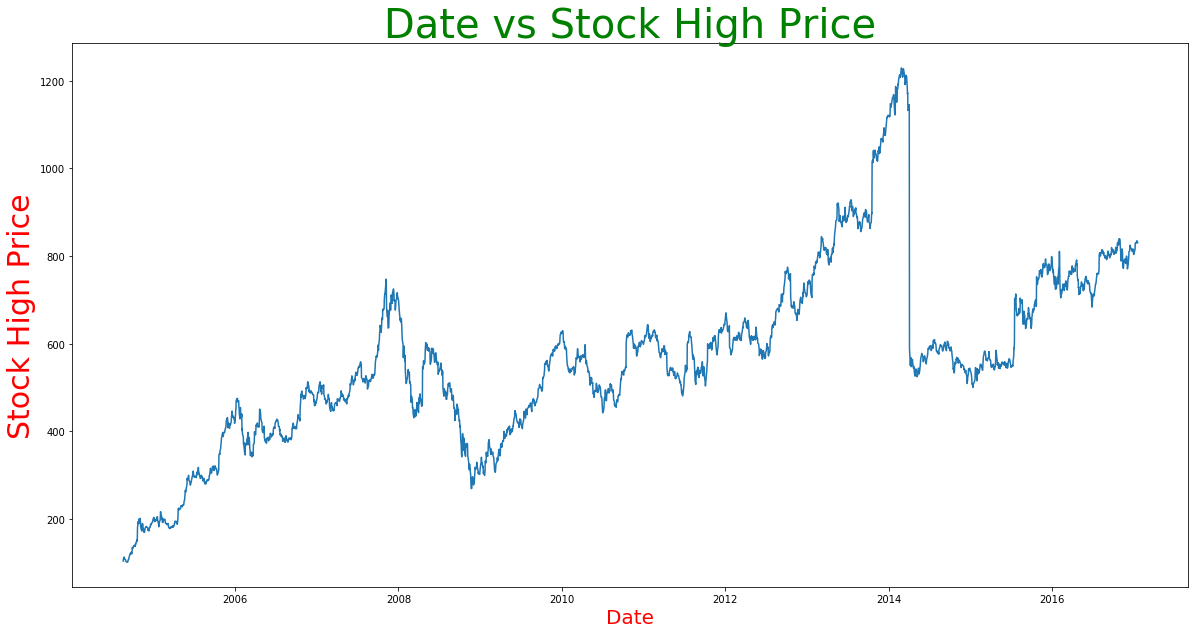

In [19]:
plt.figure(figsize=(20,10))
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(data['High'])
plt.title("Date vs Stock High Price",fontsize=40,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("Stock High Price",fontsize=30,color='r')
plt.show()

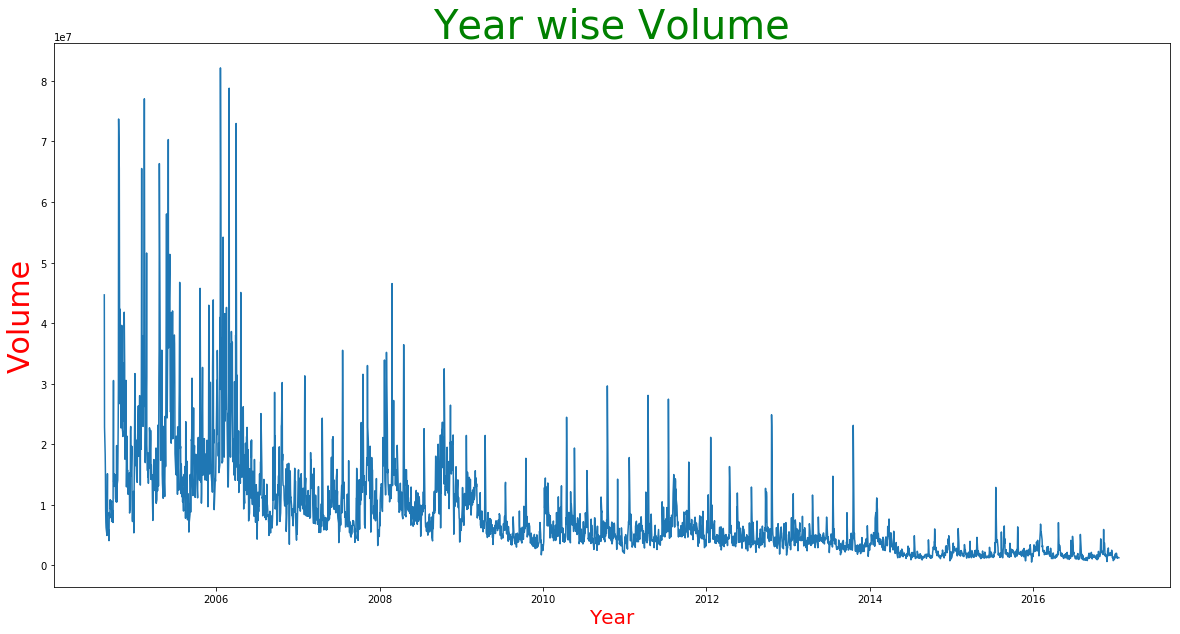

In [21]:
plt.figure(figsize=(20,10))
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(data['Volume'])
plt.title("Year wise Volume",fontsize=40,color='g')
plt.xlabel("Year",fontsize=20,color='r')
plt.ylabel("Volume",fontsize=30,color='r')
plt.show()

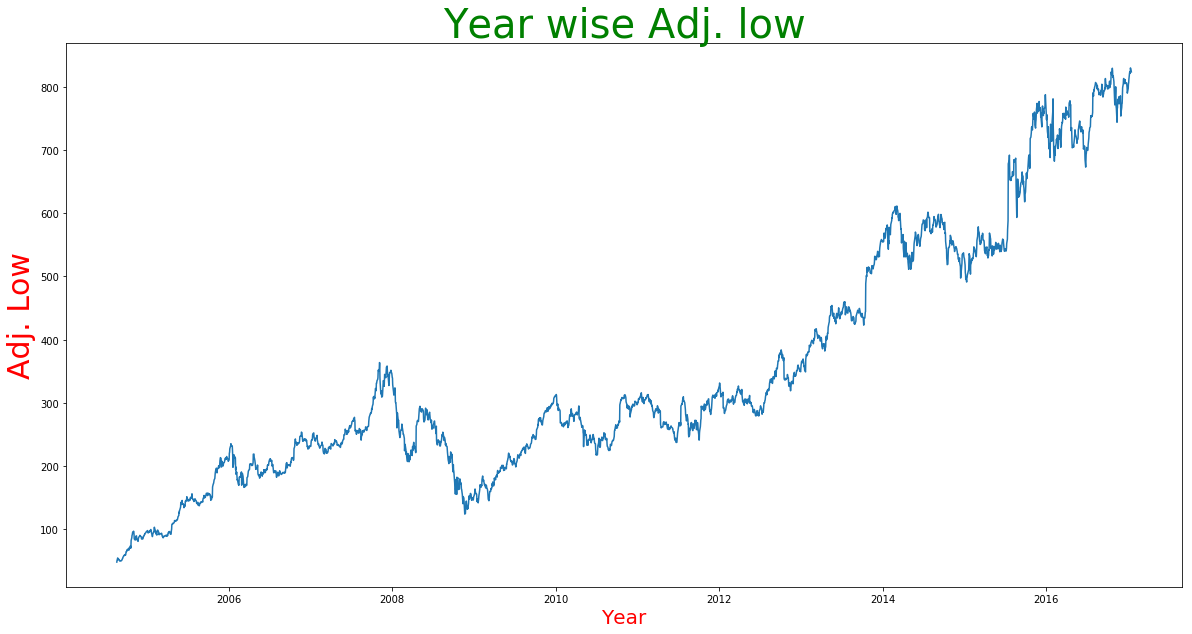

In [22]:
plt.figure(figsize=(20,10))
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(data['Adj. Low'])
plt.title("Year wise Adj. low",fontsize=40,color='g')
plt.xlabel("Year",fontsize=20,color='r')
plt.ylabel("Adj. Low",fontsize=30,color='r')
plt.show()

In [41]:
data['High'].plot("kde")

In [42]:
data['Adj. High'].plot("kde")

In [43]:
data['Ex-Dividend'].value_counts().plot("bar")

In [44]:
data['Split Ratio'].value_counts().plot("bar")

In [45]:
datax = data.drop(['Split Ratio','Ex-Dividend'],axis=1)
sns.heatmap(datax.corr(),fmt = 'f')

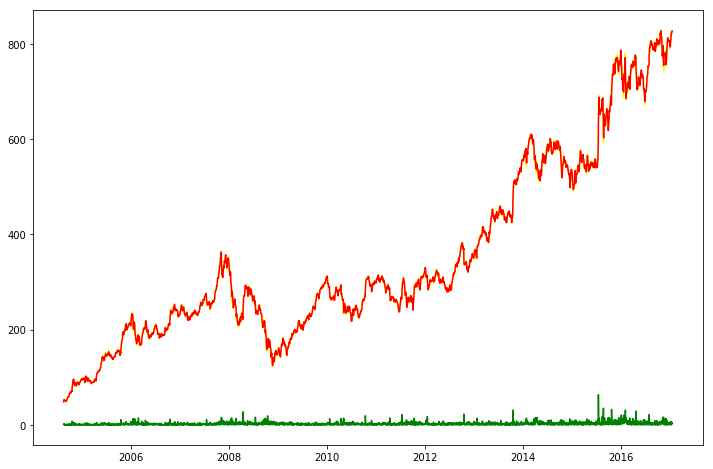

In [53]:
plt.figure(figsize=(12,8))

#gopen = data['Adj. Open']
#ghigh = data['Adj. High']
glow = data['Adj. Low']
#plt.plot(gopen)
#plt.plot(ghigh,color='r')
plt.plot(glow,color='yellow')
plt.plot(glow.rolling(window=2).mean(),color='r')
plt.plot(glow.rolling(window=2).std(), color='g')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


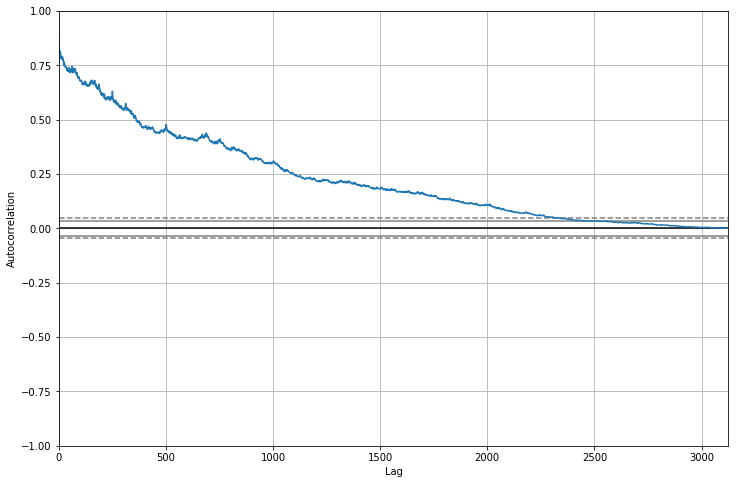

In [54]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(12,8))
autocorrelation_plot(data)
plt.show()

In [76]:
# - ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. 
# It is a class of model that captures a suite of different standard temporal structures in time series data.
# Define the model by calling ARIMA() and passing in the p, d, and q parameters.
# The model is prepared on the training data by calling the fit() function.
# Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.
# First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of
# 1 to make the time series stationary, and uses a moving average model of 0.
# When fitting the model, a lot of debug information is provided about the fit of the linear regression model. 
# We can turn this off by setting the disp argument to 0.
model = ARIMA(data['Adj. Low'], order=(5,1,0))
model_fit = model.fit(disp=0)
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Adj. Low   No. Observations:                 3124
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10009.078
Method:                       css-mle   S.D. of innovations              5.960
Date:                Sun, 07 Jan 2018   AIC                          20032.156
Time:                        18:23:27   BIC                          20074.484
Sample:                    08-20-2004   HQIC                         20047.350
                         - 01-17-2017                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2478      0.109      2.278      0.023       0.035       0.461
ar.L1.D.Adj. Low     0.1122      0.018      6.276      0.000       0.077       0.147
ar.L2.D.Adj. Low    -0.0252      0.018     -1.397      0.162      -0.060       0.010
ar.L3.D.Adj. Low    -0.0163      0.018     -0.905      0.365      -0.052       0.019
ar.L4.D.Adj. Low    -0.0186      0.018     -1.032      0.302      -0.054       0.017
ar.L5.D.Adj. Low    -0.0324      0.018     -1.812      0.070      -0.067       0.003
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4271           -1.1307j            1.8207           -0.1066
AR.2            1.4271           +1.1307j            1.8207            0.1066
AR.3           -2.1867           -0.0000j            2.1867           -0.5000
AR.4           -0.6204           -1.9679j            2.0634           -0.2986
AR.5           -0.6204           +1.9679j            2.0634            0.2986
-----------------------------------------------------------------------------
"""

In [67]:
resd = pd.DataFrame(model_fit.resid)
resd.plot()

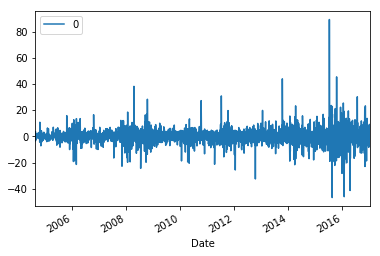

In [68]:
plt.resd = pd.DataFrame(model_fit.resid)
plt.show()

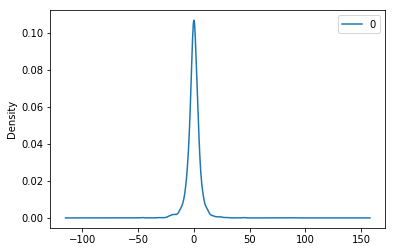

In [72]:
x = resd.plot(kind='kde')
plt.show(x)

In [90]:
X = data['Adj. High'].astype('float')
print(X.tail())
size = int(len(X)*0.66)

train,test = X[0:size],X[size:len(glow)]
print(len(train))
print(len(test))
for t in range(5):
    model = ARIMA(train,order=(5,1,0))
    fit = model.fit(disp=0)
    preds = fit.forecast()
    print("Predicted",preds[0],", Expected",test[t],"Month",test.index[t].date())

Date
2017-01-10    829.41
2017-01-11    829.90
2017-01-12    830.38
2017-01-13    834.65
2017-01-17    830.18
Name: Adj. High, dtype: float64
2062
1063
Predicted [ 345.14358625] , Expected 344.563634932 Month 2012-10-24
Predicted [ 345.14358625] , Expected 342.055893776 Month 2012-10-25
Predicted [ 345.14358625] , Expected 342.572488454 Month 2012-10-26
Predicted [ 345.14358625] , Expected 341.554345544 Month 2012-10-31
Predicted [ 345.14358625] , Expected 346.519673035 Month 2012-11-01
